<a href="https://colab.research.google.com/github/BrendonKappel/Desafio_Imply/blob/master/An%C3%A1lise_Imply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Exploração Inicial

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

# Carregando o arquivo
df = pd.read_csv('movimentacoes(in).csv')

# ======================================================================
# Analises iniciais
# ======================================================================

# Formato da tabela
print("\nTotal de linhas e colunas:")
print(df.shape)

# informações sobre as colunas
print("\n\nInformações sobre os valores")
print(df.info())

# análise estatística básica somente das colunas de valores
colunas_valores = [
    'valor_desconto',
    'valor',
    'valor_cancelado',
    'valor_juros',
    'valor_multa',
    'valor_taxa',
    'valor_taxa_juros',
    'valor_taxa_cancelado',
    'valor_cupom'
]

for col in colunas_valores:
    print(f'\nEstatísticas da coluna: {col}')
    print(df[col].describe())


# Convertendo datas para o tipo correto
df['dthr_pagamento'] = pd.to_datetime(df['dthr_pagamento'])
df['dthr_apresentacao'] = pd.to_datetime(df['dthr_apresentacao'])
df['dt_nascimento'] = pd.to_datetime(df['dt_nascimento'])

# Verifica o periodo das informações
print("\nPeríodo de tempo que aconteceram as movimentações:")
print("Início:", df['dthr_pagamento'].min().strftime('%m/%Y'))
print("Fim:   ", df['dthr_pagamento'].max().strftime('%m/%Y'))



Total de linhas e colunas:
(1200, 46)


Informações sobre os valores
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idmovimentacaoitem    1200 non-null   object 
 1   valor_desconto        1200 non-null   float64
 2   valor                 1200 non-null   float64
 3   valor_cancelado       1200 non-null   float64
 4   valor_juros           1200 non-null   float64
 5   valor_multa           1200 non-null   float64
 6   valor_taxa            1200 non-null   float64
 7   valor_taxa_juros      1200 non-null   float64
 8   valor_taxa_cancelado  1200 non-null   float64
 9   valor_cupom           1200 non-null   float64
 10  status                1200 non-null   object 
 11  dthr_pagamento        1200 non-null   object 
 12  idmovimentacao        1200 non-null   object 
 13  idproduto             1200 non-null   object 
 14  ds

# Nova seção

2. Limpeza e Preparação dos Dados

In [ ]:
# Verifica se alguma coluna tem valor nulo
print(df.isnull().sum())

# Retorna a soma de linhas duplicados
print(f'\nQuantidade de linhas duplicadas: {df.duplicated().sum()}')

# Valores do tipo data já foram convertidos na etapa anterior

# Não foi necessário fazer nada nessa etapa

idmovimentacaoitem      0
valor_desconto          0
valor                   0
valor_cancelado         0
valor_juros             0
valor_multa             0
valor_taxa              0
valor_taxa_juros        0
valor_taxa_cancelado    0
valor_cupom             0
status                  0
dthr_pagamento          0
idmovimentacao          0
idproduto               0
dscproduto              0
idequipamento           0
tipo_equipamento        0
idformapag              0
dscformapag             0
idtipoproduto           0
dsctipoproduto          0
idapresentacao          0
dscapresentacao         0
dthr_apresentacao       0
idprodutocategoria      0
dscproduto_categoria    0
idevento                0
dscevento               0
idpessoa                0
nome                    0
cpf                     0
rg                      0
passaporte              0
documento               0
documento_unificado     0
newsletter              0
end_cidade              0
end_estado              0
end_pais    

3. Análise Exploratória de Dados (AED)


Faturamento total: 607544.79

Lucro total: 573451.39

Ticket médio por pessoa: 506.29

Desconto total: 91292.76

Valor cancelado total: 5970.56

Valor juros total: 12232.36

Valor multa total: 17681.77

Valor taxa total: 30449.29

Valor taxa juros total: 8996.51

Valor taxa cancelado: 6118.32

Valor cupom: 12308.33

Lucro da imply com taxas: 45564.12

Outliers financeiros


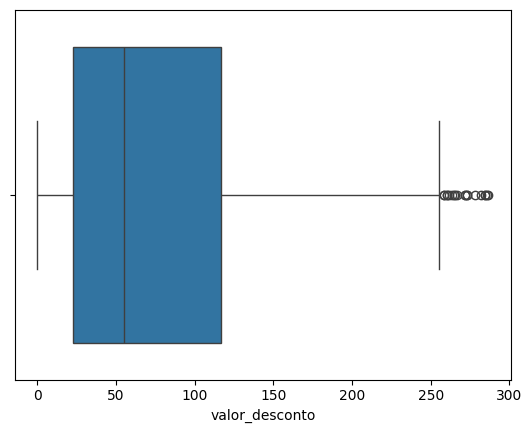

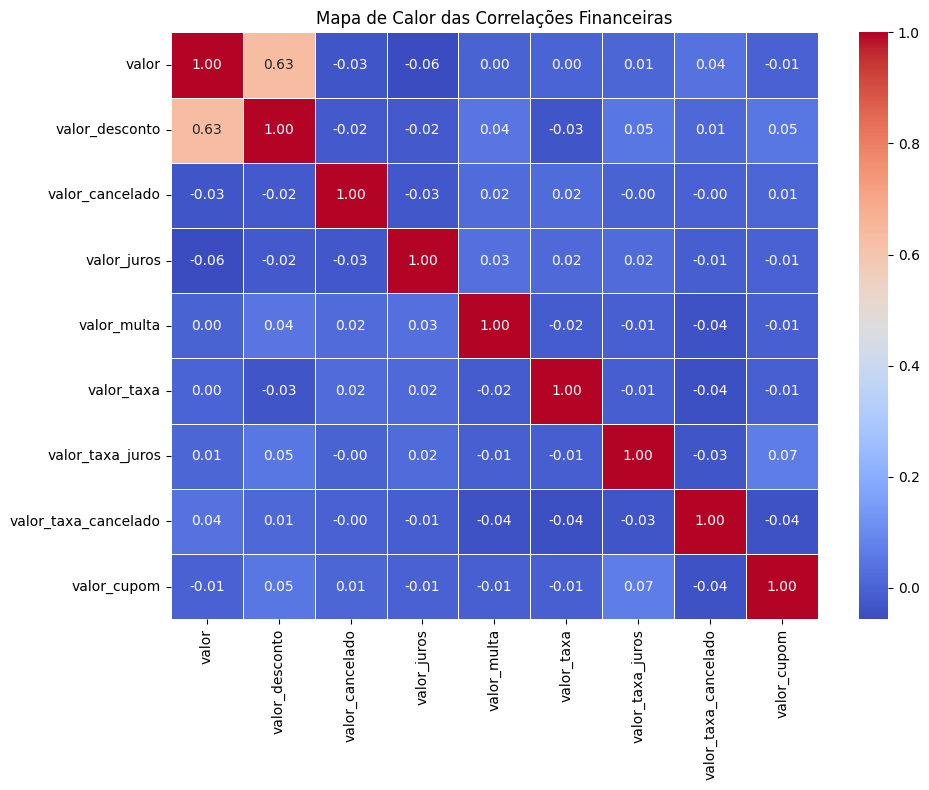

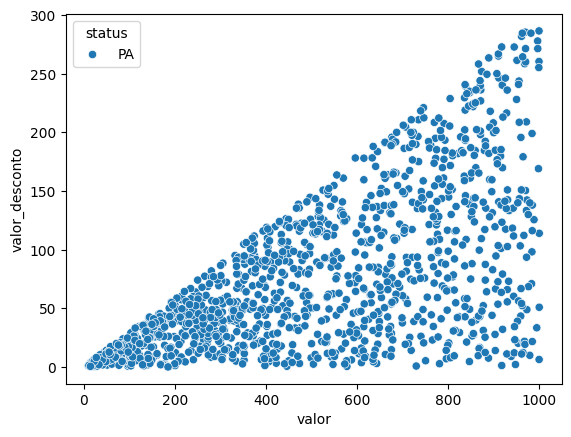

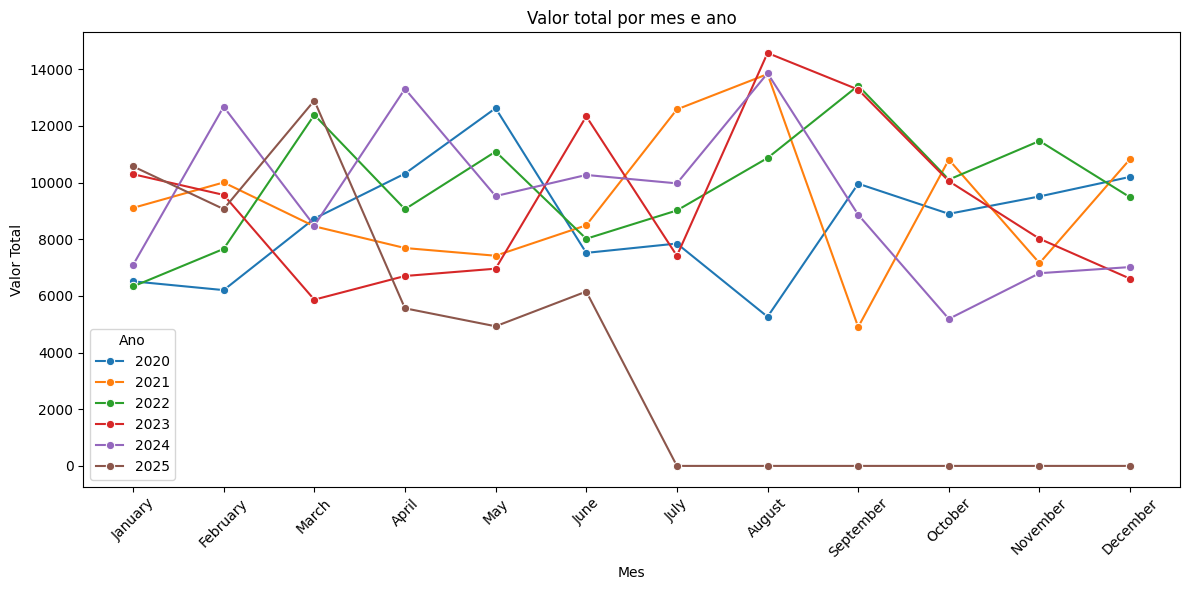

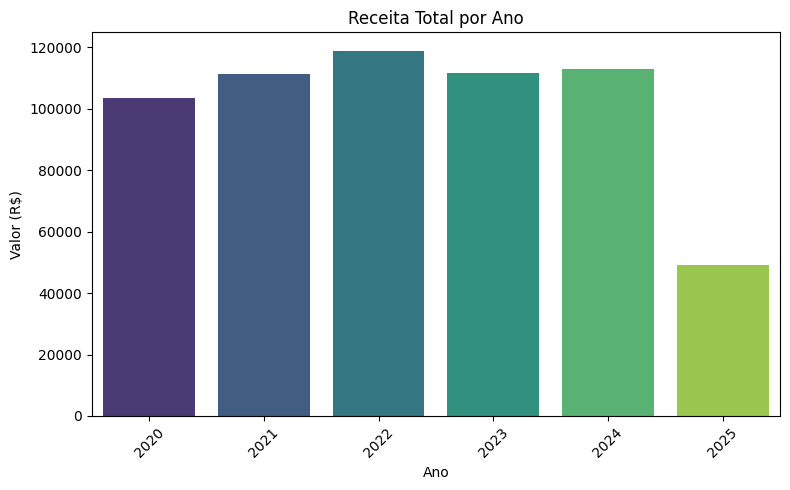

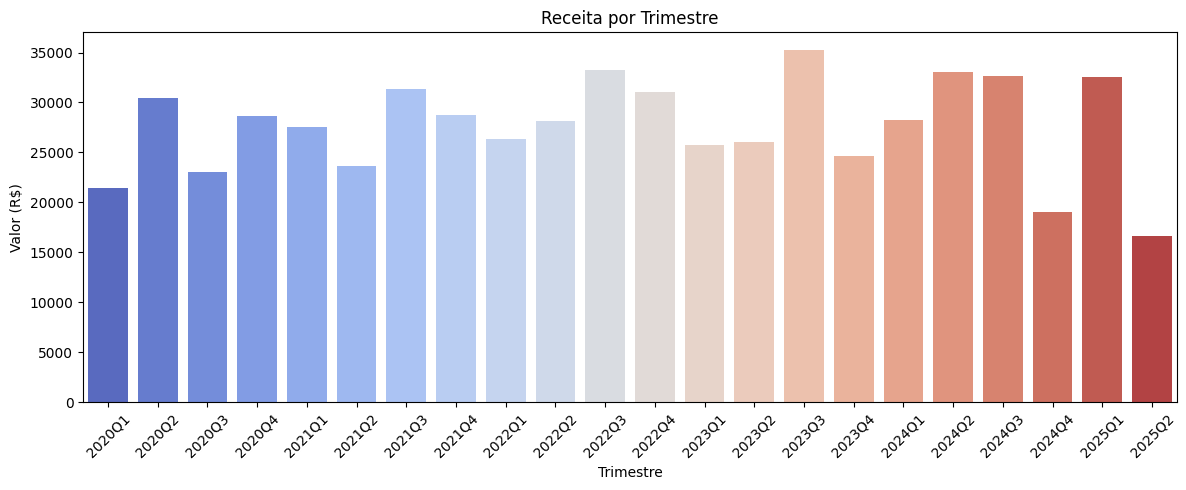

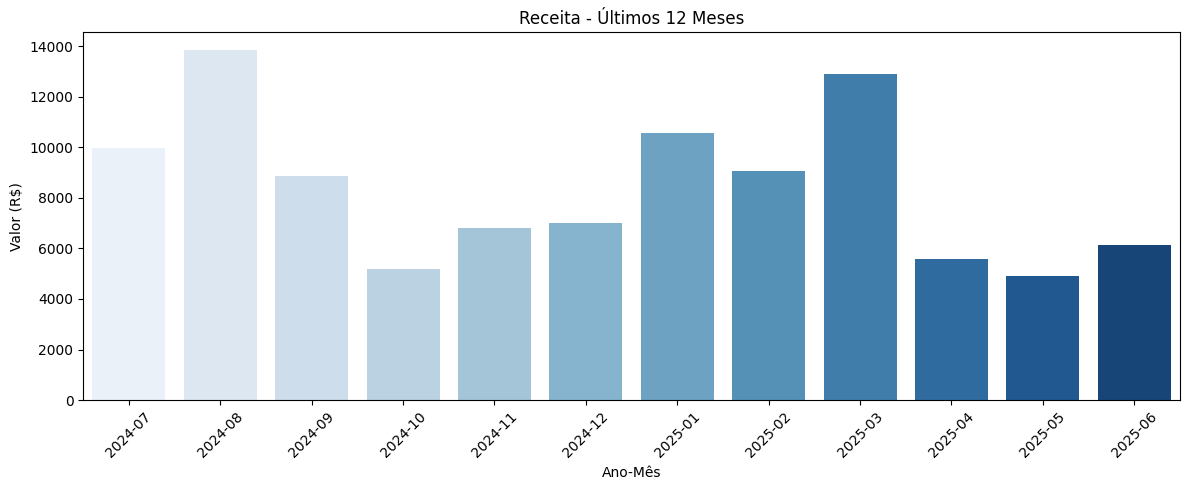

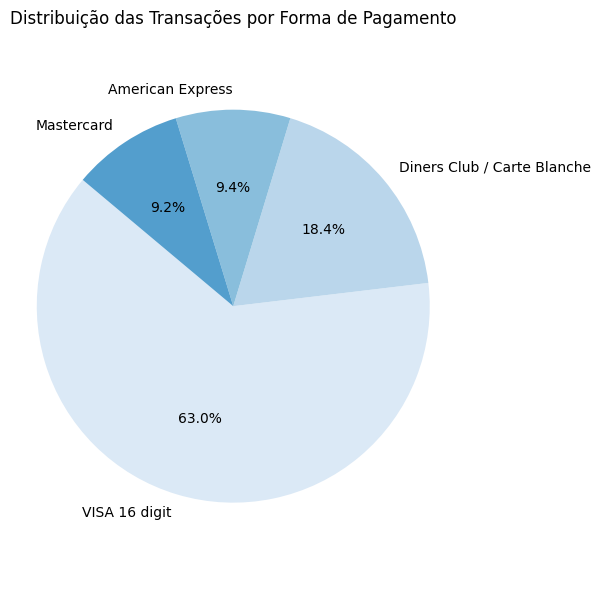

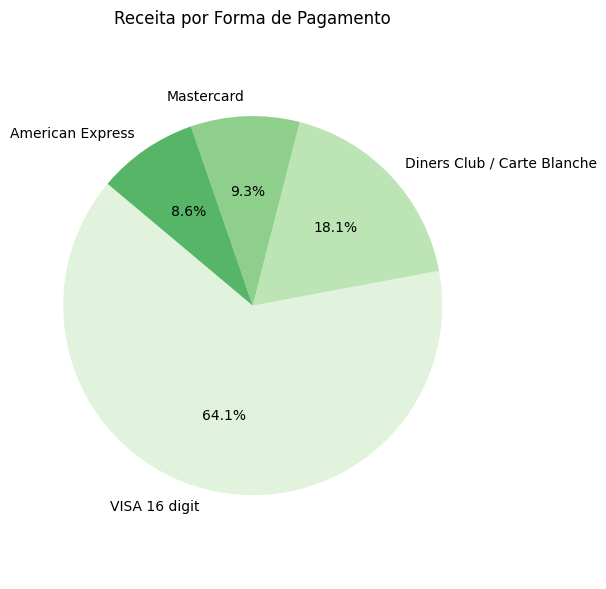

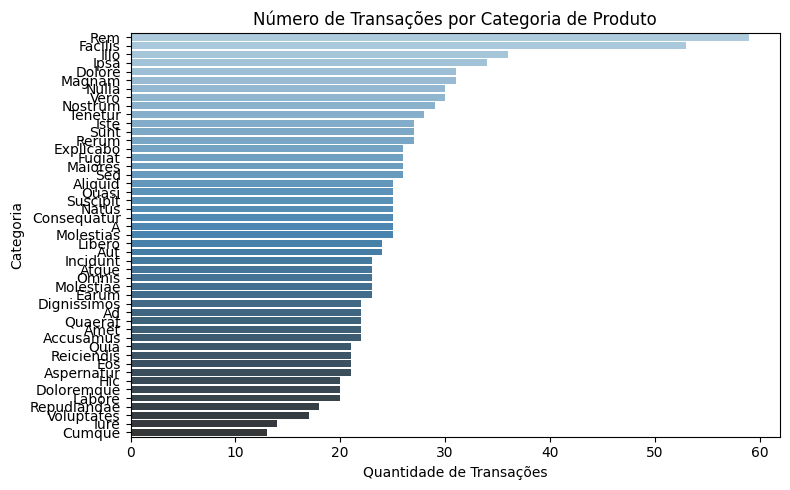

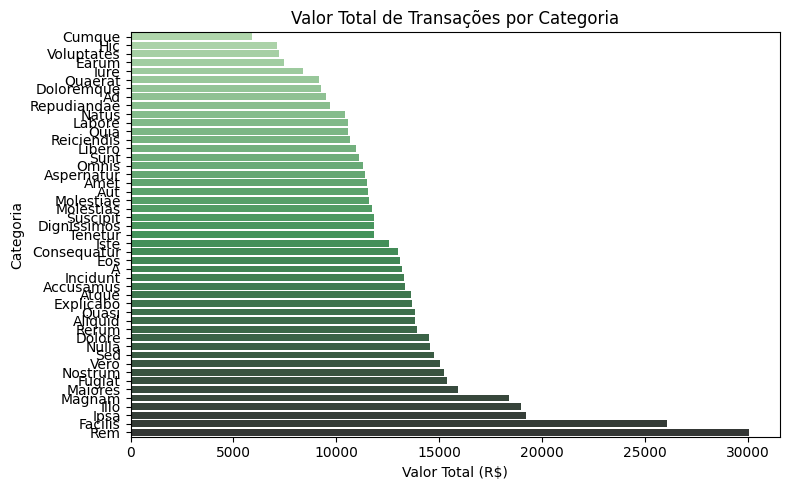

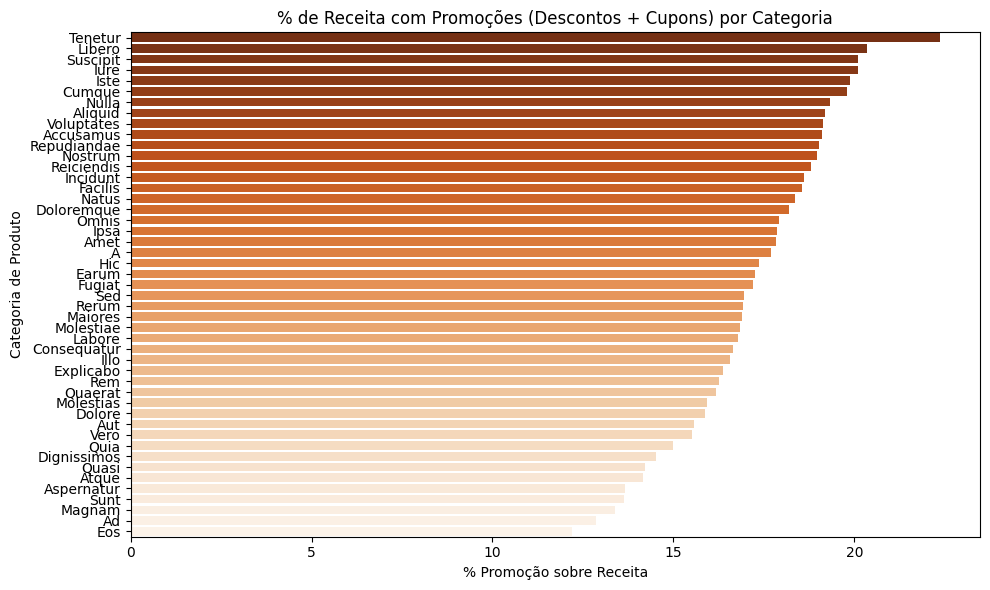

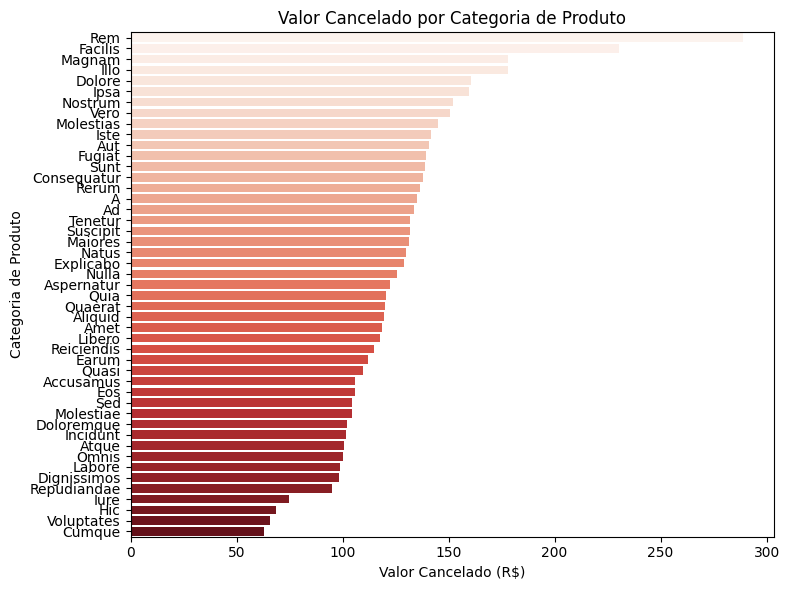

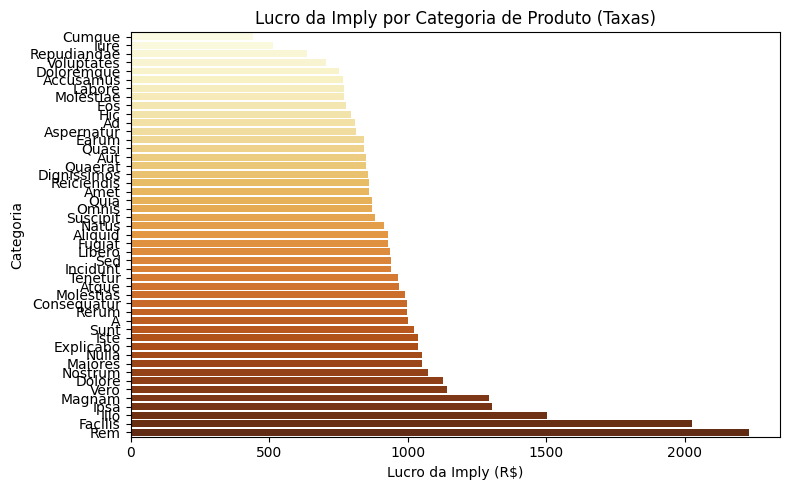

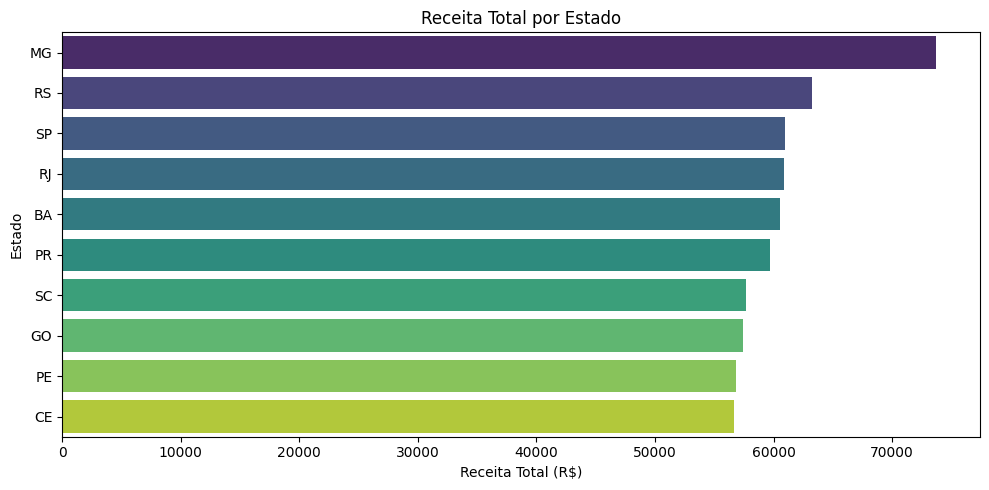

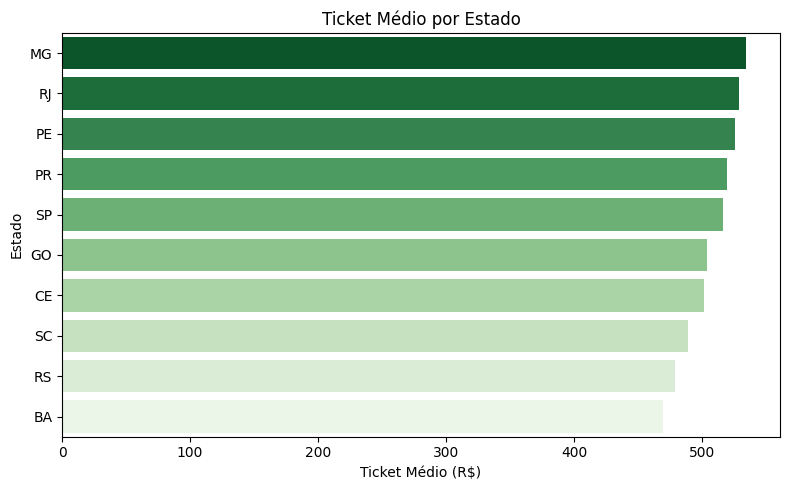

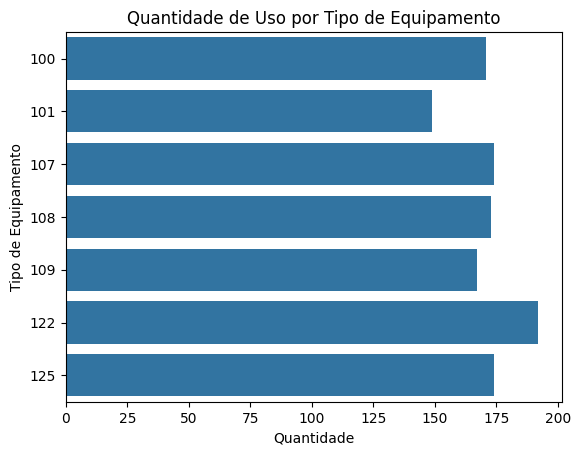

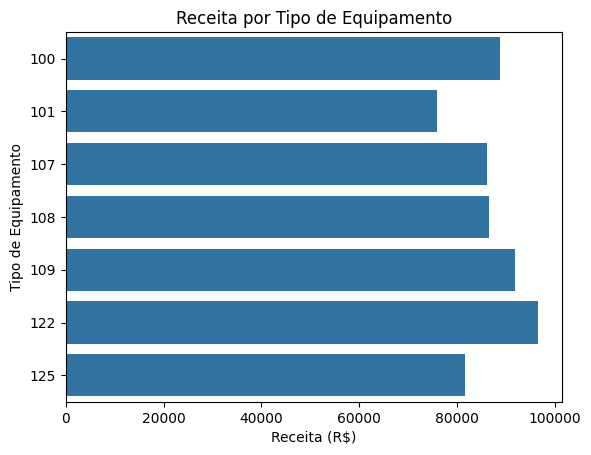

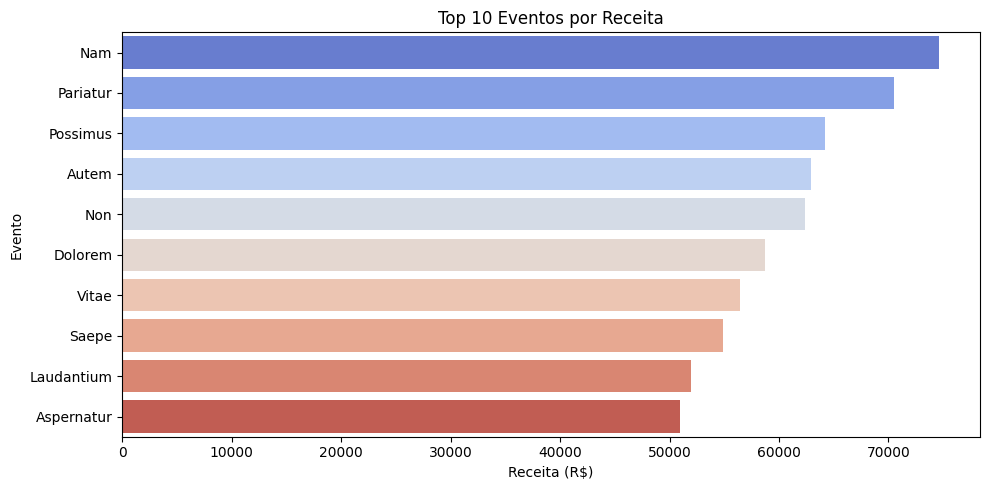

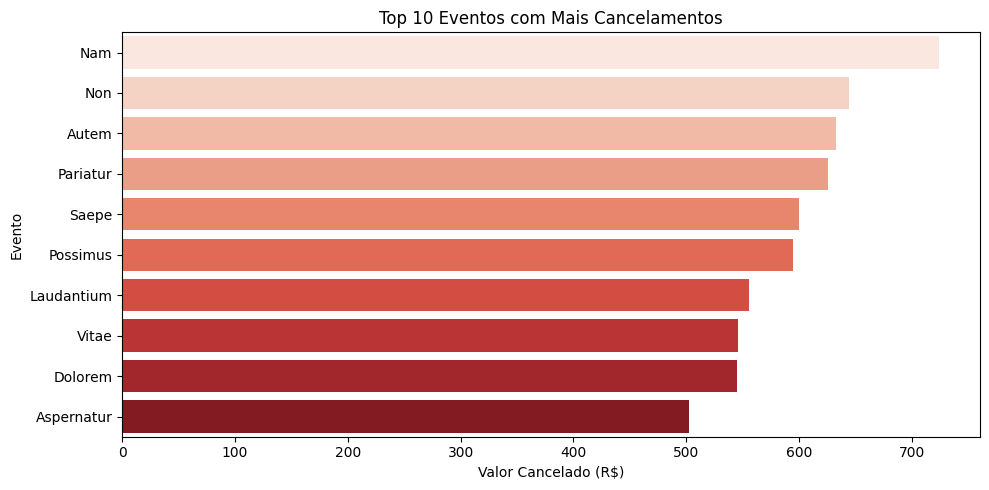

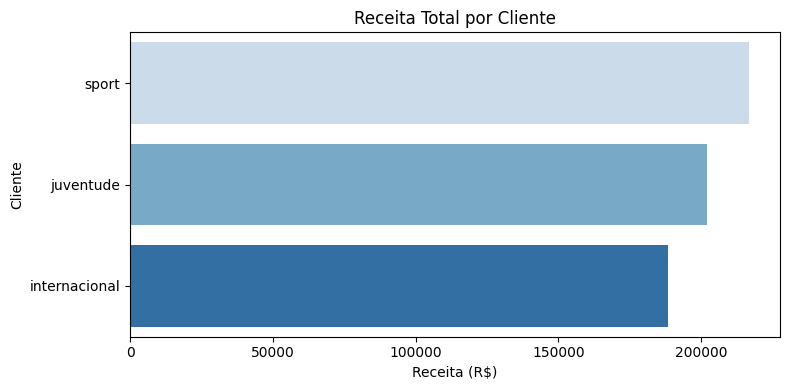

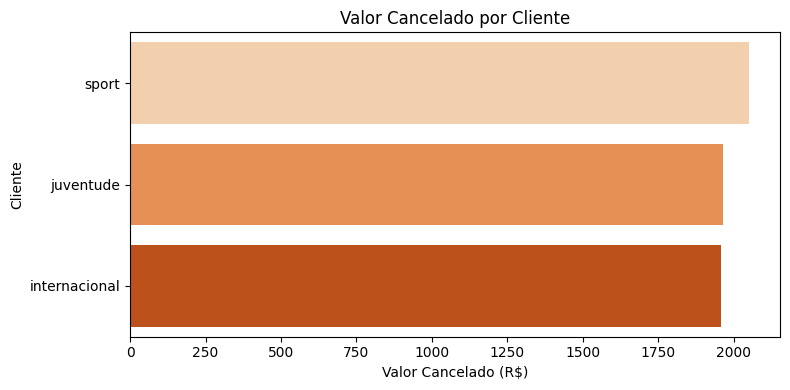

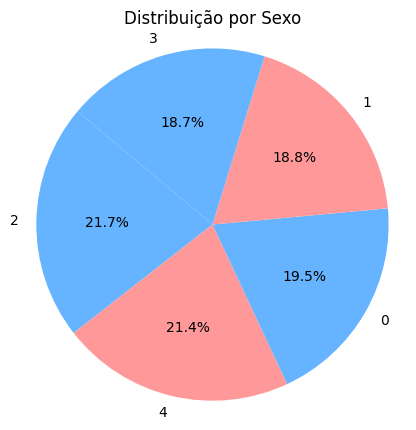

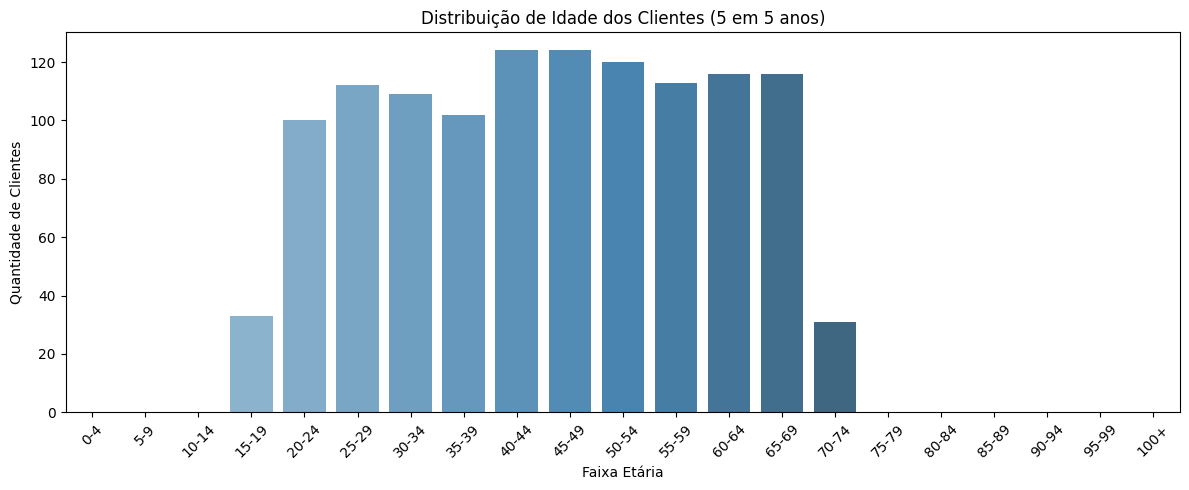

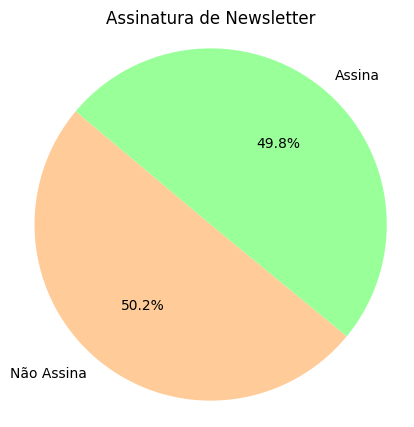

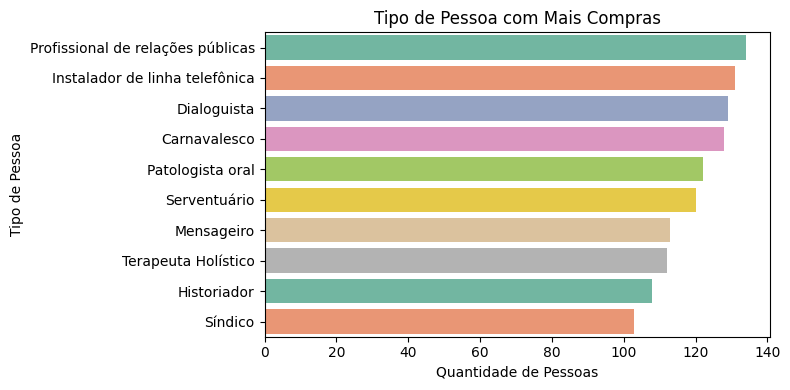

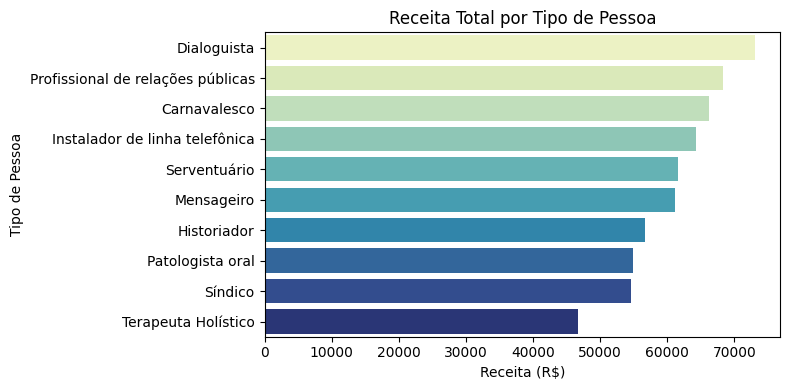

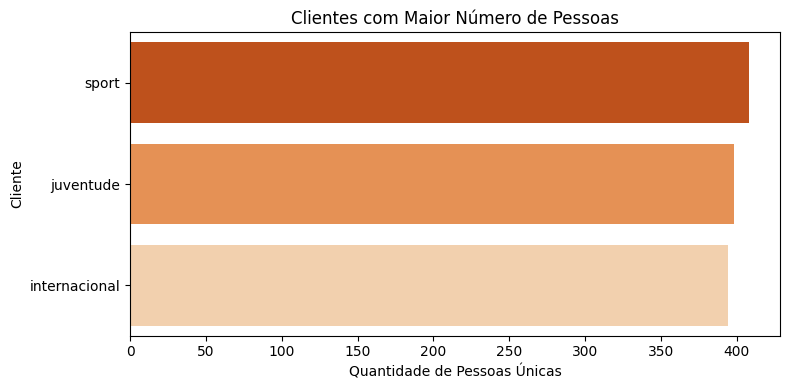

In [ ]:
warnings.filterwarnings('ignore') # --> retira a legenda dos gráficos

# ======================================================================
# Analise dos valores financeiros
# ======================================================================

# Faturamento total
faturamento_total = df['valor'].sum()
print(f'\nFaturamento total: {faturamento_total:.2f}')

# Lucro total
df['lucro'] = (
    df['valor']                   # valor total da cobrança
    - df['valor_desconto']        # desconto
    - df['valor_cancelado']       # parte do total que foi cancelada
    + df['valor_juros']           # juros no valor
    + df['valor_multa']           # multa aplicado por algum motivo
    + df['valor_taxa']            # taxa por usar o sistema
    - df['valor_cupom']           # cupom de desconto
    + df['valor_taxa_cancelado']  # taxa por cancelar algo
    + df['valor_taxa_juros']      # juros aplicado na taxa
)
lucro_total = df['lucro'].sum()
print(f'\nLucro total: {lucro_total:.2f}')

# ticket médio por pessoa
ticket_medio = df['valor'].sum() / df['idpessoa'].nunique()
print(f'\nTicket médio por pessoa: {ticket_medio:.2f}')

# desconto total
desconto_total = df['valor_desconto'].sum()
print(f'\nDesconto total: {desconto_total:.2f}')

# valor cancelado total
cancelado_total = df['valor_cancelado'].sum()
print(f'\nValor cancelado total: {cancelado_total:.2f}')

# valor juros total
juros_total = df['valor_juros'].sum()
print(f'\nValor juros total: {juros_total:.2f}')

# Valor multa total
multa_total = df['valor_multa'].sum()
print(f'\nValor multa total: {multa_total:.2f}')

# valor taxa total
taxa_total = df['valor_taxa'].sum()
print(f'\nValor taxa total: {taxa_total:.2f}')

# valor taxa juros total
taxa_juros_total = df['valor_taxa_juros'].sum()
print(f'\nValor taxa juros total: {taxa_juros_total:.2f}')

# valor taxa cancelado
taxa_cancelado_total = df['valor_taxa_cancelado'].sum()
print(f'\nValor taxa cancelado: {taxa_cancelado_total:.2f}')

# valor cupom
cupom_total = df['valor_cupom'].sum()
print(f'\nValor cupom: {cupom_total:.2f}')

# Onde a imply tem o seu lucro? (taxas)
lucro_imply = taxa_cancelado_total + taxa_juros_total + taxa_total
print(f'\nLucro da imply com taxas: {lucro_imply:.2f}')

# Detectação de outliers financeiros (Encontrado na coluna de desconto, outras não possuiam)
print("\nOutliers financeiros")
sns.boxplot(x=df['valor_desconto'])


# ======================================================================
# Análise de Relação entre variáveis
# ======================================================================

# Mapa de calor para verificar correlações entre valores financeiros
valores = df[['valor', 'valor_desconto', 'valor_cancelado', 'valor_juros',
              'valor_multa', 'valor_taxa', 'valor_taxa_juros',
              'valor_taxa_cancelado', 'valor_cupom']]

corr = valores.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor das Correlações Financeiras')
plt.tight_layout()
plt.show()


# Gráfico de dispersão para ver a relaçoa entre valor e desconto
sns.scatterplot(data=df, x='valor', y='valor_desconto', hue='status')

# ======================================================================
# Análise Temporal
# ======================================================================

# Movimentações por mes
df['ano'] = df['dthr_pagamento'].dt.year
df['mes'] = df['dthr_pagamento'].dt.month_name()
meses_ordem = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df['mes'] = pd.Categorical(df['mes'], categories=meses_ordem, ordered=True)
df_mes_ano = df.groupby(['ano', 'mes'])['valor'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mes_ano, x='mes', y='valor', hue='ano', marker='o', palette='tab10')

plt.title('Valor total por mes e ano')
plt.xlabel('Mes')
plt.ylabel('Valor Total')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

# Movimentações por ano
df_anual = df.groupby('ano')['valor'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=df_anual, x='ano', y='valor', palette='viridis')
plt.title('Receita Total por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Movimentações por trimestre
df['trimestre'] = df['dthr_pagamento'].dt.to_period('Q')
df_trimestre = df.groupby('trimestre')['valor'].sum().reset_index()
df_trimestre['trimestre'] = df_trimestre['trimestre'].astype(str)
plt.figure(figsize=(12, 5))
sns.barplot(data=df_trimestre, x='trimestre', y='valor', palette='coolwarm')
plt.title('Receita por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Receita dos ultimos 12 meses
df['ano_mes'] = df['dthr_pagamento'].dt.to_period('M')
df_mensal = df.groupby('ano_mes')['valor'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano_mes'].astype(str)
ultimos_12 = df_mensal.tail(12)
plt.figure(figsize=(12, 5))
sns.barplot(data=ultimos_12, x='ano_mes', y='valor', palette='Blues')
plt.title('Receita - Últimos 12 Meses')
plt.xlabel('Ano-Mês')
plt.ylabel('Valor (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# ======================================================================
# Análise de Formas de Pagamentos
# ======================================================================

# Forma de pagamento mais usada
pagamento_count = df['dscformapag'].value_counts().reset_index()
pagamento_count.columns = ['Forma de Pagamento', 'Quantidade']
plt.figure(figsize=(6,6))
plt.pie(pagamento_count['Quantidade'],
        labels=pagamento_count['Forma de Pagamento'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues"))
plt.title('Distribuição das Transações por Forma de Pagamento')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Forma de pagamento com maior receita
pagamento_valor = df.groupby('dscformapag')['valor'].sum().reset_index()
pagamento_valor.columns = ['Forma de Pagamento', 'Valor Total']
pagamento_valor = pagamento_valor.sort_values(by='Valor Total', ascending=False)
plt.figure(figsize=(6,6))
plt.pie(pagamento_valor['Valor Total'],
        labels=pagamento_valor['Forma de Pagamento'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Greens"))
plt.title('Receita por Forma de Pagamento')
plt.axis('equal')
plt.tight_layout()
plt.show()


# ======================================================================
# Análise por Categoria de Produto
# ======================================================================

# Número de transações por categoria
transacoes_categoria = df['dscproduto'].value_counts().reset_index()
transacoes_categoria.columns = ['Categoria', 'Quantidade']
plt.figure(figsize=(8, 5))
sns.barplot(data=transacoes_categoria, x='Quantidade', y='Categoria', palette='Blues_d')
plt.title('Número de Transações por Categoria de Produto')
plt.xlabel('Quantidade de Transações')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# valor financeiro total (somatório) gerado por cada categoria.
valor_categoria = df.groupby('dscproduto')['valor'].sum().reset_index().sort_values(by='valor', ascending=True)
plt.figure(figsize=(8, 5))
sns.barplot(data=valor_categoria, x='valor', y='dscproduto', palette='Greens_d')
plt.title('Valor Total de Transações por Categoria')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()


# Promoções (Descontos + Cupons) por Categoria
df['total_promocao'] = df['valor_desconto'] + df['valor_cupom']
promocao_categoria = df.groupby('dscproduto').agg({
    'valor': 'sum',
    'total_promocao': 'sum'
}).reset_index()

promocao_categoria['perc_promocao'] = (promocao_categoria['total_promocao'] / promocao_categoria['valor']) * 100
promocao_categoria = promocao_categoria.sort_values(by='perc_promocao', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=promocao_categoria, x='perc_promocao', y='dscproduto', palette='Oranges_r')
plt.title('% de Receita com Promoções (Descontos + Cupons) por Categoria')
plt.xlabel('% Promoção sobre Receita')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()


# Valor Cancelado por Categoria de Produto
cancelamento_categoria = df.groupby('dscproduto')['valor_cancelado'].sum().reset_index().sort_values(by='valor_cancelado', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(data=cancelamento_categoria, x='valor_cancelado', y='dscproduto', palette='Reds')
plt.title('Valor Cancelado por Categoria de Produto')
plt.xlabel('Valor Cancelado (R$)')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()


# categoria que traz mais lucro para a imply com taxas
df['lucro_imply'] = df['valor_taxa_cancelado'] + df['valor_taxa_juros'] + df['valor_taxa']
lucro_categoria = df.groupby('dscproduto')['lucro_imply'].sum().reset_index().sort_values(by='lucro_imply', ascending=True)
plt.figure(figsize=(8, 5))
sns.barplot(data=lucro_categoria, x='lucro_imply', y='dscproduto', palette='YlOrBr')
plt.title('Lucro da Imply por Categoria de Produto (Taxas)')
plt.xlabel('Lucro da Imply (R$)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# ======================================================================
# Análise Geográfica
# ======================================================================

# Regiões que geram mais receita
receita_estado = df.groupby('end_estado')['valor'].sum().reset_index().sort_values(by='valor', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=receita_estado, x='valor', y='end_estado', palette='viridis')
plt.title('Receita Total por Estado')
plt.xlabel('Receita Total (R$)')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# ticket médio por estado
ticket_estado = df.groupby('end_estado')['valor'].mean().reset_index().sort_values(by='valor', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(data=ticket_estado, x='valor', y='end_estado', palette='Greens_r')
plt.title('Ticket Médio por Estado')
plt.xlabel('Ticket Médio (R$)')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# ======================================================================
# Análise de Equipamentos
# ======================================================================

# Qual equipamento mais usado
equip_uso = df['tipo_equipamento'].value_counts().reset_index()
equip_uso.columns = ['tipo_equipamento', 'quantidade']
equip_uso = equip_uso.sort_values(by='quantidade', ascending=True)  # ordena para o gráfico
sns.barplot(data=equip_uso, x='quantidade', y='tipo_equipamento', orient='h')
plt.title('Quantidade de Uso por Tipo de Equipamento')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Equipamento')
plt.show()


# Quais tipos de equipamento geram mais receita
equip_lucro = df.groupby('tipo_equipamento')['valor'].sum().reset_index().sort_values(by='valor', ascending=True)
sns.barplot(data=equip_lucro, x='valor', y='tipo_equipamento', orient='h')
plt.title('Receita por Tipo de Equipamento')
plt.xlabel('Receita (R$)')
plt.ylabel('Tipo de Equipamento')
plt.show()

# ======================================================================
# Análise de Eventos
# ======================================================================

# Eventos Campeões de Receita
evento_receita = df.groupby('dscevento')['valor'].sum().reset_index().sort_values(by='valor', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=evento_receita, y='dscevento', x='valor', palette='coolwarm')
plt.title('Top 10 Eventos por Receita')
plt.xlabel('Receita (R$)')
plt.ylabel('Evento')
plt.tight_layout()
plt.show()


# Eventos com Mais Cancelamento
eventos_cancelados = df[df['valor_cancelado'] > 0].groupby('dscevento')['valor_cancelado'].sum().reset_index().sort_values(by='valor_cancelado', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=eventos_cancelados, y='dscevento', x='valor_cancelado', palette='Reds')
plt.title('Top 10 Eventos com Mais Cancelamentos')
plt.xlabel('Valor Cancelado (R$)')
plt.ylabel('Evento')
plt.tight_layout()
plt.show()

# ======================================================================
# Análise por Cliente
# ======================================================================

# Receita total por cliente
cliente_receita = df.groupby('cliente')['valor'].sum().reset_index().sort_values(by='valor', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=cliente_receita, x='valor', y='cliente', palette='Blues')
plt.title('Receita Total por Cliente')
plt.xlabel('Receita (R$)')
plt.ylabel('Cliente')
plt.tight_layout()
plt.show()

# Valor Cancelado por Cliente
cancelamentos_cliente = df[df['valor_cancelado'] > 0].groupby('cliente')['valor_cancelado'].sum().reset_index().sort_values(by='valor_cancelado', ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(data=cancelamentos_cliente, x='valor_cancelado', y='cliente', palette='Oranges')
plt.title('Valor Cancelado por Cliente')
plt.xlabel('Valor Cancelado (R$)')
plt.ylabel('Cliente')
plt.tight_layout()
plt.show()


# ======================================================================
# DETECTAR O PÚBLIC ALVO (mais geram receita)
# ======================================================================

# Sexo
sexo_counts = df.groupby('idpessoa')['sexo'].first().value_counts()
plt.figure(figsize=(5,5))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribuição por Sexo')
plt.axis('equal')
plt.show()

# Faixa etária
df['dt_nascimento'] = pd.to_datetime(df['dt_nascimento'], errors='coerce')
df['idade'] = df['dt_nascimento'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
faixa_etaria = df.groupby('idpessoa')['idade'].first().dropna().astype(int)
bins = list(range(0, 101, 5)) + [200]  # Última faixa 100+
labels = [f'{i}-{i+4}' for i in range(0, 100, 5)] + ['100+']
faixa_etaria_cut = pd.cut(faixa_etaria, bins=bins, labels=labels, right=False)
faixa_etaria_counts = faixa_etaria_cut.value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, palette='Blues_d')
plt.title('Distribuição de Idade dos Clientes (5 em 5 anos)')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Assina newsletter
newsletter_counts = df.groupby('idpessoa')['newsletter'].first().value_counts()
plt.figure(figsize=(5,5))
plt.pie(newsletter_counts, labels=['Não Assina', 'Assina'], autopct='%1.1f%%',
        startangle=140, colors=['#ffcc99', '#99ff99'])
plt.title('Assinatura de Newsletter')
plt.axis('equal')
plt.show()


# Tipo de Pessoa com Maior Número de Compras
tipo_pessoa = df.groupby('idpessoa')['dscpessoa_tipo'].first().value_counts().reset_index()
tipo_pessoa.columns = ['dscpessoa_tipo', 'quantidade']
plt.figure(figsize=(8,4))
sns.barplot(data=tipo_pessoa, x='quantidade', y='dscpessoa_tipo', palette='Set2')
plt.title('Tipo de Pessoa com Mais Compras')
plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Tipo de Pessoa')
plt.tight_layout()
plt.show()


# Receita Total por Tipo de Pessoa
receita_por_tipo_pessoa = df.groupby('dscpessoa_tipo')['valor'].sum().reset_index().sort_values(by='valor', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(data=receita_por_tipo_pessoa, x='valor', y='dscpessoa_tipo', palette='YlGnBu')
plt.title('Receita Total por Tipo de Pessoa')
plt.xlabel('Receita (R$)')
plt.ylabel('Tipo de Pessoa')
plt.tight_layout()
plt.show()


# Cliente com maior numero de pessoas
pessoas_por_cliente = df.groupby('cliente')['idpessoa'].nunique().reset_index().sort_values(by='idpessoa', ascending=False)
pessoas_por_cliente.columns = ['cliente', 'qtd_pessoas']
plt.figure(figsize=(8, 4))
sns.barplot(data=pessoas_por_cliente, x='qtd_pessoas', y='cliente', palette='Oranges_r')
plt.title('Clientes com Maior Número de Pessoas')
plt.xlabel('Quantidade de Pessoas Únicas')
plt.ylabel('Cliente')
plt.tight_layout()
plt.show()



4. Geração de Insights



In [ ]:
# ======================================================================
# Analise dos valores financeiros
# ======================================================================
'''
O faturamento foi de R$ 607.544,79, com lucro de R$ 573.451,39 e ticket médio de R$ 506,29.
Descontos somaram R$ 91.292,76, cupons R$ 12.308,33 e cancelamentos R$ 5.970,56. Juros e multas
totalizaram R$ 29.914,13. A imply lucrou R$ 45.564,12 com taxas.
Detectou-se outliers (valores fora do normal) apenas nos descontos consedidos.
'''


# ======================================================================
# Análise de Relação entre variáveis
# ======================================================================

'''
A análise de relação entre variáveis demonstra uma alta correlação entre valor e desconto,
indicando que clientes com maiores valores de pagamento tendem a receber maiores descontos.
'''


# ======================================================================
# Análise Temporal
# ======================================================================

'''
Temporalmente, a receita anual demonstra relativa estabilidade, porém há uma queda acentuada no final de
2024 e em 2025 (ano incompleto, até junho), com os meses de abril, maio e junho de 2025 sendo os piores
registrados nos últimos cinco anos considerando o mesmo periodo. O terceiro trimestre, de maneira geral,
concentra o maior número de picos de receita, e a receita dos últimos 12 meses mostra estabilidade com leve declínio no trimestre final.
'''


# ======================================================================
# Análise de Formas de Pagamentos
# ======================================================================
'''
VISA 16 digit é claramente dominante tanto no número de transações (63%),
quanto na receita que passa por ele (64.1%)
'''

# ======================================================================
# Análise por Categoria de Produto
# ======================================================================
'''
  Categorias de Produto: As líderes (Rem, Facilis, Ipsa, lillo e Magnam.) impulsionam transações e
  receita, mas também concentram os maiores valores cancelados.
  Os que mais oferecem descontos para vender são tenetur, libero e suscipit.
'''



# ======================================================================
# Análise Geográfica
# ======================================================================
'''
  MG lidera em receita e ticket médio. RJ e PE têm ticket médio alto (potencial de valor).
  RS, SP, e BA, embora com boa receita/volume, apresentam ticket médio mais baixo, exigindo otimização.
'''



# ======================================================================
# Análise de Equipamentos
# ======================================================================
'''
Equipamentos: Tipo 122 lidera em uso e receita, confirmando uma correlação direta entre a utilização do equipamento e o valor gerado.
'''



# ======================================================================
# Análise de Eventos
# ======================================================================
'''
Os eventos com maior receita (Nam) também é o que apresenta o maior valor de cancelamento. O evento "Non" apresenta a 2° posição nos cancelados,
mas a 5° na receita.
'''



# ======================================================================
# Análise por Cliente
# ======================================================================
'''
O cliente sport impulsiona a maior receita, mas também concentra o maior valor de cancelamentos.
'''


# ======================================================================
# Público alvo (mais geram receita)
# ======================================================================
'''
Público Alvo: O cliente ideal é predominantemente de 40-54 anos,
com destaque para Dialoguistas (alta receita individual), Profissionais de Relações Públicas (pessoas que mais compram),
Instaladores de Linha Telefônica e carnavalesco. A distribuição por sexo é equilibrada,
e há potencial para aumentar assinaturas de newsletter (metade não assina).
'''


# ======================================================================
# RESUMO...
# ======================================================================
'''
Receita de R\$ 607 mil no periodo de 2020 a 2025, com lucro de R\$ 573 mil e ticket médio de R\$ 506.
Descontos e cancelamentos são os principais prejuízos.
VISA domina pagamentos.
MG lidera em receita.
Tipo 122 é o equipamento mais lucrativo.
Os produtos com maior faturamento  são Rem, Facilis, Ipsa, lillo e Magnam.
Público ideal: pessoas de 40 a 54 anos, especialmente Dialoguistas e Profissionais de Relações Públicas, com distribuição equilibrada entre os sexos.
'''


# ======================================================================
# OPORTUNIDADES...
# ======================================================================
'''
VISA (16 dígitos) domina (63% das transações) – negociar taxas mais baixas com a operadora ou incentivar outras bandeiras para reduzir a dependência.

Tipo 122 (equipamento mais lucrativo) - Priorizar manutenção e atualização.

Focar campanhas de marketing no público alvo (40-54 anos, Dialoguistas/Profissionais de Relações Públicas) - Criar conteúdos personalizados ou programas de fidelidade.

Newsletters - Captar mais assinantes (metade não assina) para aumentar retenção e repetição de compras.

Crescimento Estratégico: Explorar o potencial de regiões com alto ticket médio e que não são líderes no faturamento (PE)

Focar no terceiro trimestre (período historicamente forte) com marketing de maneira estratégica para reverter a queda em abril-junho de 2025.
'''


'\nReceita de R\\$\u202f607 mil no periodo de 2020 a 2025, com lucro de R\\$\u202f573 mil e ticket médio de R\\$\u202f506. \nDescontos e cancelamentos são os principais prejuízos. \nVISA domina pagamentos. \nMG lidera em receita. \nTipo 122 é o equipamento mais lucrativo. \nOs produtos com maior faturamento  são Rem, Facilis, Ipsa, lillo e Magnam. \nPúblico ideal: pessoas de 40 a 54 anos, especialmente Dialoguistas e Profissionais de Relações Públicas, com distribuição equilibrada entre os sexos.\n\n'